<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [ ]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



Dataset 1:
True Count: 196
False Count: 304
Expectation (Mean): 0.39
Variance: 0.00

Dataset 2:
True Count: 203
False Count: 297
Expectation (Mean): 0.41
Variance: 0.00

Dataset 3:
True Count: 142
False Count: 358
Expectation (Mean): 0.28
Variance: 0.00



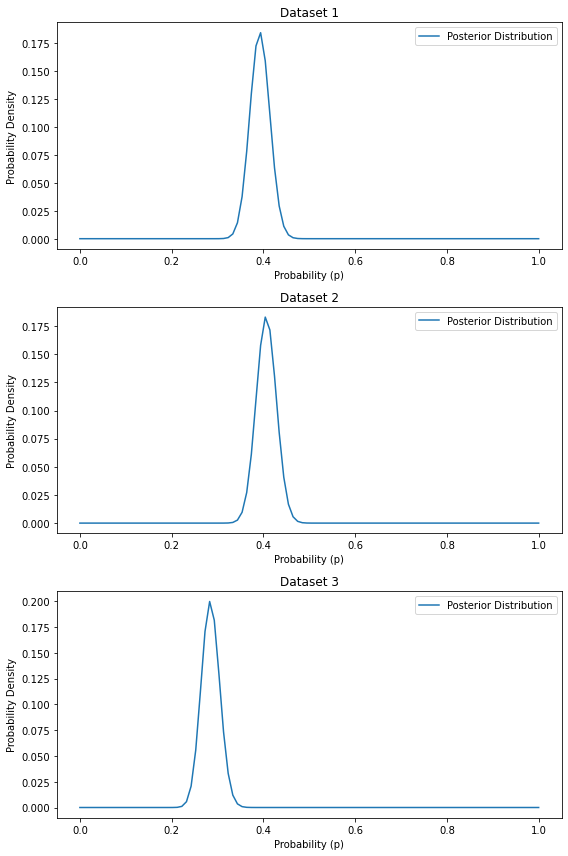

'--------------------Write your code above this line------------------------------'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets from JSON files
dataset_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
datasets = []

for dataset_path in dataset_paths:
    with open(dataset_path, 'r') as file:
        dataset = json.load(file)
    datasets.append(dataset)

# Define the likelihood function (binomial likelihood)
def likelihood(data, p):
    successes = sum(data)
    failures = len(data) - successes
    return (p ** successes) * ((1 - p) ** failures)

# Define the prior (uniform prior)
def prior(p, N):
    return 1 / N

# Apply Bayesian inference for each dataset and count True/False
posterior_distributions = []

for dataset in datasets:
    N = len(dataset)
    posterior = []

    successes = sum(dataset)
    failures = N - successes

    for p in np.linspace(0, 1, 100):  # Range of probabilities
        likelihood_term = likelihood(dataset, p)
        prior_term = prior(p, N)
        posterior.append(likelihood_term * prior_term)

    # Normalize the posterior distribution
    posterior /= np.sum(posterior)

    posterior_distributions.append(posterior)

# Calculate expectation (mean) and variance for each posterior distribution
expectations = [np.sum(np.linspace(0, 1, 100) * posterior) for posterior in posterior_distributions]
variances = [np.sum((np.linspace(0, 1, 100) - expectations[i]) ** 2 * posterior) for i, posterior in enumerate(posterior_distributions)]

# Print True/False counts, expectations, and variances
for i, (dataset, expectation, variance) in enumerate(zip(datasets, expectations, variances)):
    print(f'Dataset {i + 1}:')
    print(f'True Count: {sum(dataset)}')
    print(f'False Count: {len(dataset) - sum(dataset)}')
    print(f'Expectation (Mean): {expectation:.2f}')
    print(f'Variance: {variance:.2f}')
    print()

# Create a (3,1) plot
plt.figure(figsize=(8, 12))

for i, posterior in enumerate(posterior_distributions):
    plt.subplot(3, 1, i + 1)
    plt.plot(np.linspace(0, 1, 100), posterior, label='Posterior Distribution')
    plt.xlabel('Probability (p)')
    plt.ylabel('Probability Density')
    plt.title(f'Dataset {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

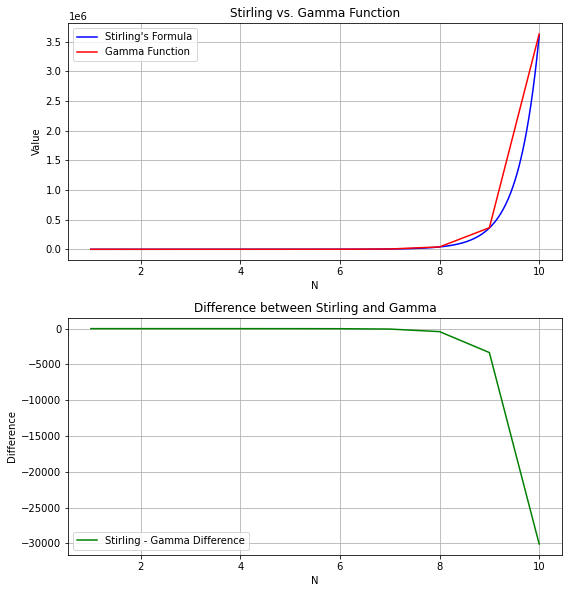

'--------------------Write your code above this line------------------------------'

In [4]:

'''--------------------Write your code below this line------------------------------'''
import math
import matplotlib.pyplot as plt

def stirling_formula(N):
    # Stirling's approximation
    return math.sqrt(2 * math.pi * N) * (N / math.e) ** N

def gamma_function(N):
    # Calculate the Gamma function for (N + 1)
    return math.gamma(N + 1)

def calculate_difference(N):
    stirling_result = stirling_formula(N)
    gamma_result = gamma_function(N)
    return stirling_result - gamma_result

N_values = list(range(1, 11))
continuous_N_values = [n / 100 for n in range(100, 1001)]  # Create a continuous range of N values

# Calculate Stirling's formula and the Gamma function for each N and continuous N
stirling_values = [stirling_formula(N) for N in N_values]
continuous_stirling_values = [stirling_formula(N) for N in continuous_N_values]
gamma_values = [gamma_function(N) for N in N_values]
differences = [calculate_difference(N) for N in N_values]

# Create a (3,1) plot
plt.figure(figsize=(8, 12))

# Plot Stirling's formula as a continuous curve
plt.subplot(3, 1, 1)
plt.plot(continuous_N_values, continuous_stirling_values, label="Stirling's Formula", color='blue')
plt.plot(N_values, gamma_values, label="Gamma Function", color='red')
plt.xlabel('N')
plt.ylabel('Value')
plt.legend()
plt.title('Stirling vs. Gamma Function')
plt.grid()

# Create a difference plot
plt.subplot(3, 1, 2)
plt.plot(N_values, differences, label="Stirling - Gamma Difference", color='green')
plt.xlabel('N')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference between Stirling and Gamma')
plt.grid()

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


# C)
Calculate the above condition **analytically**,
<br> 
$p_{\rm max} = \frac{M}{N}$
<br>
<br> **Steps:** <br>
<br> Just take the derivative and set equal to 0, and use the T/F counts from part A) to figure out $p_{\rm max}$ for each set.
<br>
<br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1: 0.645**<br> **Data set 2: 0.684** <br>**Data set 3: 0.397**
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

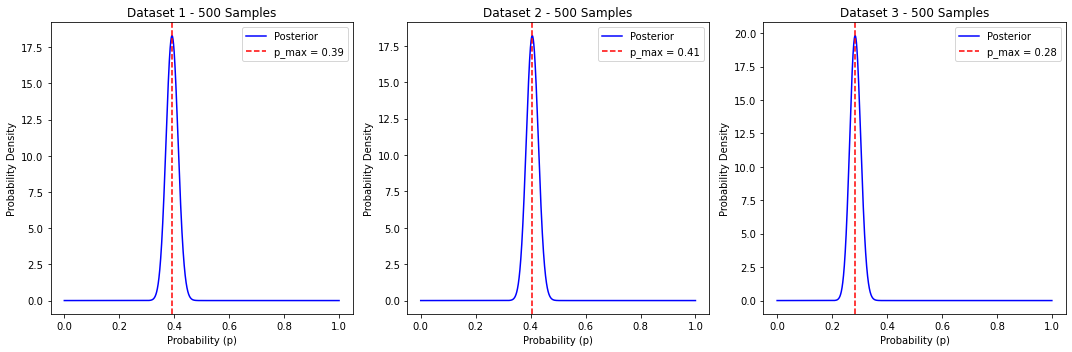

'--------------------Write your code above this line------------------------------'

In [20]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Load the datasets from JSON files
dataset_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
datasets = []

for dataset_path in dataset_paths:
    with open(dataset_path, 'r') as file:
        dataset = json.load(file)
    datasets.append(dataset)

def bayesian_inference(N=5000, center_val=0.5):
    bias_values = np.linspace(0, 1, N)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, dataset in enumerate(datasets):
        count_ = len(dataset)
        count_arry = [count_]  # Initialize count_arry for each subplot
        observed_heads = sum(dataset)
        observed_tails = len(dataset) - observed_heads
        true_mean = center_val * count_

        # Calculate the posterior using a Beta distribution
        posterior = beta(observed_heads + 1, observed_tails + 1)
        posterior_pdf = posterior.pdf(bias_values)

        # Find the maximum posterior estimate for the bias
        mle_estimate = bias_values[np.argmax(posterior_pdf)]

        # Plot the posterior distribution
        axs[i].plot(bias_values, posterior_pdf, label='Posterior', color='blue')
        axs[i].axvline(x=mle_estimate, color='red', linestyle='--', label=f'p_max = {mle_estimate:.2f}')

        axs[i].set_title(f'Dataset {i+1} - {count_} Samples')
        axs[i].set_xlabel('Probability (p)')
        axs[i].set_ylabel('Probability Density')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

bayesian_inference()
'''--------------------Write your code above this line------------------------------'''
#it looks like the coins are much tail-biased

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

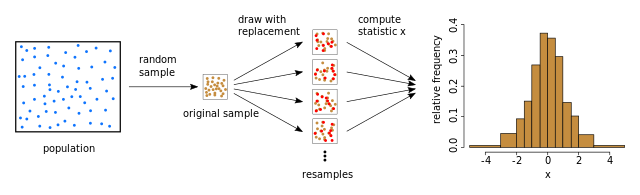
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Dataset 1 Bootstrapping Results:
Sample Size: 5, Expectation: 0.392, Variance: 0.054
Sample Size: 15, Expectation: 0.401, Variance: 0.013
Sample Size: 40, Expectation: 0.392, Variance: 0.006
Sample Size: 60, Expectation: 0.391, Variance: 0.004
Sample Size: 90, Expectation: 0.393, Variance: 0.002
Sample Size: 150, Expectation: 0.389, Variance: 0.001
Sample Size: 210, Expectation: 0.391, Variance: 0.001
Sample Size: 300, Expectation: 0.392, Variance: 0.001
Sample Size: 400, Expectation: 0.391, Variance: 0.001


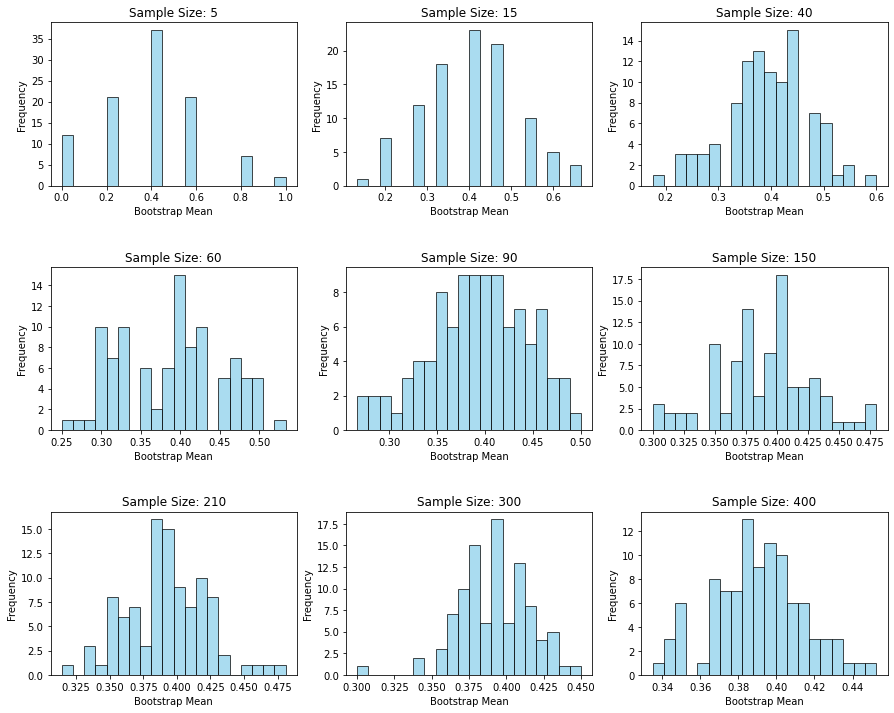

Dataset 2 Bootstrapping Results:
Sample Size: 5, Expectation: 0.422, Variance: 0.051
Sample Size: 15, Expectation: 0.419, Variance: 0.016
Sample Size: 40, Expectation: 0.405, Variance: 0.005
Sample Size: 60, Expectation: 0.407, Variance: 0.005
Sample Size: 90, Expectation: 0.407, Variance: 0.003
Sample Size: 150, Expectation: 0.407, Variance: 0.001
Sample Size: 210, Expectation: 0.405, Variance: 0.001
Sample Size: 300, Expectation: 0.412, Variance: 0.001
Sample Size: 400, Expectation: 0.403, Variance: 0.001


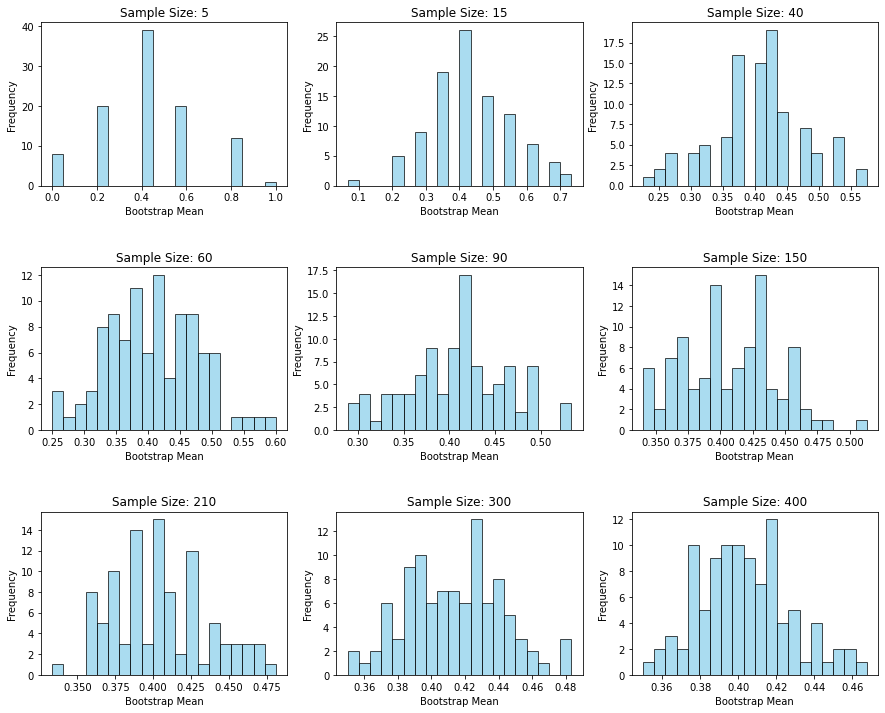

Dataset 3 Bootstrapping Results:
Sample Size: 5, Expectation: 0.266, Variance: 0.041
Sample Size: 15, Expectation: 0.283, Variance: 0.014
Sample Size: 40, Expectation: 0.288, Variance: 0.006
Sample Size: 60, Expectation: 0.287, Variance: 0.003
Sample Size: 90, Expectation: 0.289, Variance: 0.003
Sample Size: 150, Expectation: 0.285, Variance: 0.001
Sample Size: 210, Expectation: 0.284, Variance: 0.001
Sample Size: 300, Expectation: 0.284, Variance: 0.001
Sample Size: 400, Expectation: 0.285, Variance: 0.000


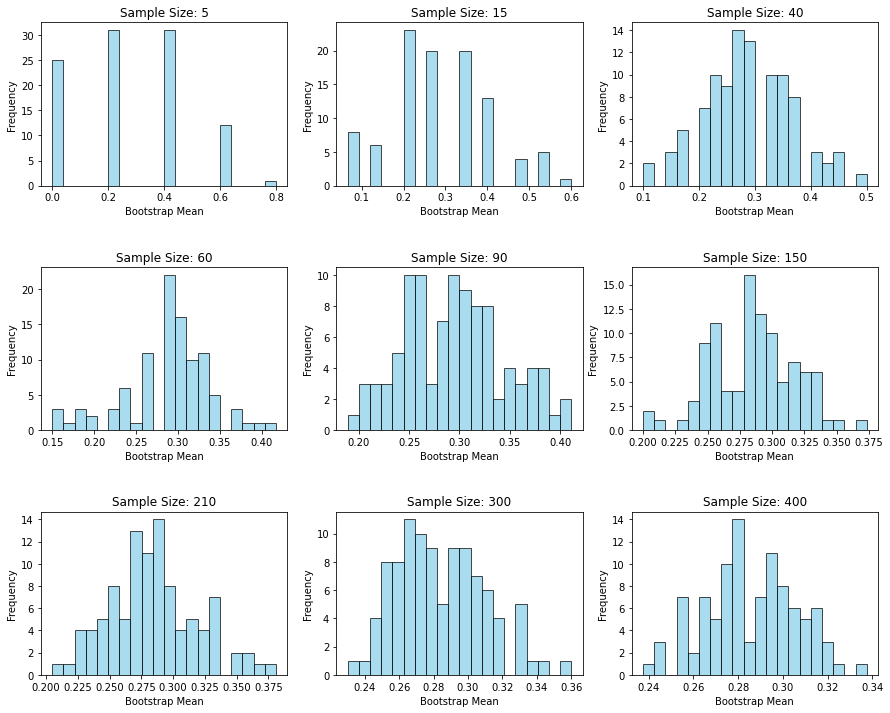

'--------------------Write your code above this line------------------------------'

In [22]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets from JSON files
dataset_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
datasets = []

for dataset_path in dataset_paths:
    with open(dataset_path, 'r') as file:
        dataset = json.load(file)
    datasets.append(dataset)

# Function to perform bootstrapping and create histograms
def perform_bootstrapping(dataset, sample_sizes, n_bootstrap=100):
    num_datasets = len(dataset)
    n_rows, n_cols = 3, 3  # Number of rows and columns for subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 12))
    fig.subplots_adjust(hspace=0.5)
    
    for i, sample_size in enumerate(sample_sizes):
        row, col = i // n_cols, i % n_cols  # Determine the row and column for each subplot
        bootstrap_means = []  # Store the means from each bootstrap
        
        for _ in range(n_bootstrap):
            # Perform bootstrapping
            resampled_data = np.random.choice(dataset, sample_size, replace=True)
            bootstrap_mean = np.mean(resampled_data)
            bootstrap_means.append(bootstrap_mean)
        
        # Create a histogram for the bootstrap means
        axs[row, col].hist(bootstrap_means, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
        axs[row, col].set_title(f'Sample Size: {sample_size}')
        axs[row, col].set_xlabel('Bootstrap Mean')
        axs[row, col].set_ylabel('Frequency')
        
        # Calculate and print the expectation value and variance
        expectation = np.mean(bootstrap_means)
        variance = np.var(bootstrap_means)
        print(f"Sample Size: {sample_size}, Expectation: {expectation:.3f}, Variance: {variance:.3f}")

    plt.show()

# Sample sizes to use
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

# Perform bootstrapping for each dataset
for i, dataset in enumerate(datasets):
    print(f"Dataset {i+1} Bootstrapping Results:")
    perform_bootstrapping(dataset, sample_sizes)
'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

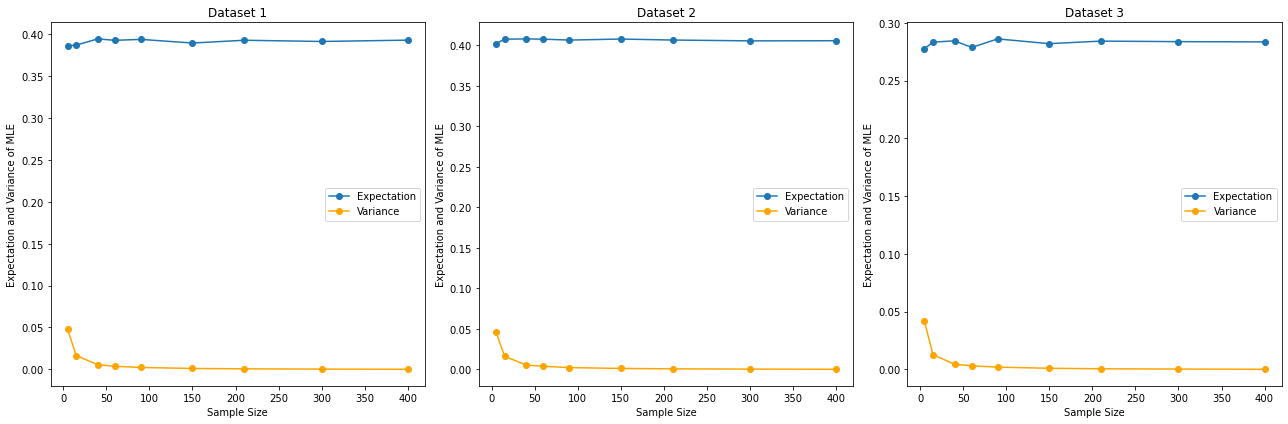

'--------------------Write your code above this line------------------------------'

In [24]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets from JSON files
dataset_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
datasets = []

for dataset_path in dataset_paths:
    with open(dataset_path, 'r') as file:
        dataset = json.load(file)
    datasets.append(dataset)

# Sample sizes
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

# Number of simulations
n_simulations = 1000

# Lists to store results for each dataset
expectations = []
variances = []

# Perform simulations for each dataset
for dataset in datasets:
    dataset_expectations = []
    dataset_variances = []
    
    for sample_size in sample_sizes:
        mle_estimates = []
        
        for _ in range(n_simulations):
            # Simulate data from the dataset with the given sample size
            sampled_data = np.random.choice(dataset, sample_size, replace=False)
            mle_estimate = np.mean(sampled_data)
            mle_estimates.append(mle_estimate)
        
        # Calculate expectation and variance for the MLE estimates
        expectation = np.mean(mle_estimates)
        variance = np.var(mle_estimates)
        
        dataset_expectations.append(expectation)
        dataset_variances.append(variance)
    
    expectations.append(dataset_expectations)
    variances.append(dataset_variances)

# Plot results for each dataset
plt.figure(figsize=(18, 6))
for i in range(len(datasets)):
    plt.subplot(1, len(datasets), i+1)
    plt.plot(sample_sizes, expectations[i], marker='o', label='Expectation')
    plt.plot(sample_sizes, variances[i], marker='o', color='orange', label='Variance')
    plt.xlabel('Sample Size')
    plt.ylabel('Expectation and Variance of MLE')
    plt.title(f'Dataset {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''
#the expectation values are much lower than the ones calculated in part C, which is kinda what I expected since I think we were going in assuming fair coins, but it seems that is not the case.

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

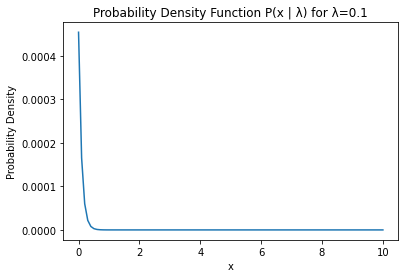

'--------------------Write your code above this line------------------------------'

In [25]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
        self.normalization_constant = np.exp(1 / self.decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-x / self.decay_constant)

# Example usage:
particle = Particle(0.1)

x_values = np.linspace(0, 10, 100)
pdf_values = [particle.pdf_decay(x) for x in x_values]

plt.plot(x_values, pdf_values)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function P(x | λ) for λ=0.1')
plt.show()
'''--------------------Write your code above this line------------------------------'''

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

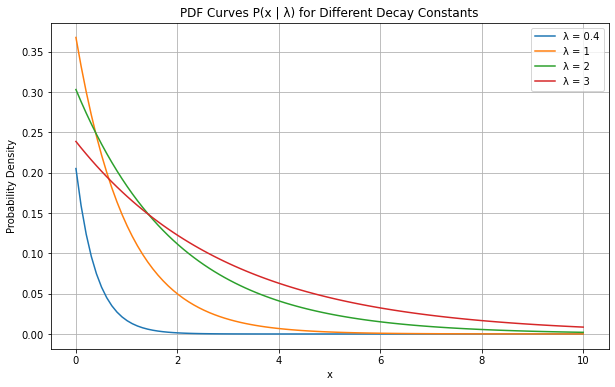

'--------------------Write your code above this line------------------------------'

In [27]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-x / self.decay_constant)

    def normalization(self):
        return np.exp(1 / self.decay_constant)

# Create instances for four particles with different decay constants
decay_constants = [0.4, 1, 2, 3]
particles = [Particle(decay_constant) for decay_constant in decay_constants]

# Calculate PDF values for each particle
x_values = np.linspace(0, 10, 100)
pdf_values = []

for particle in particles:
    particle.normalization_constant = particle.normalization()
    pdf_values.append([particle.pdf_decay(x) for x in x_values])

# Plot the PDF curves and label them
plt.figure(figsize=(10, 6))

for i, particle in enumerate(particles):
    plt.plot(x_values, pdf_values[i], label=f'λ = {particle.decay_constant}')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF Curves P(x | λ) for Different Decay Constants')
plt.legend()
plt.grid(True)
plt.show()
'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

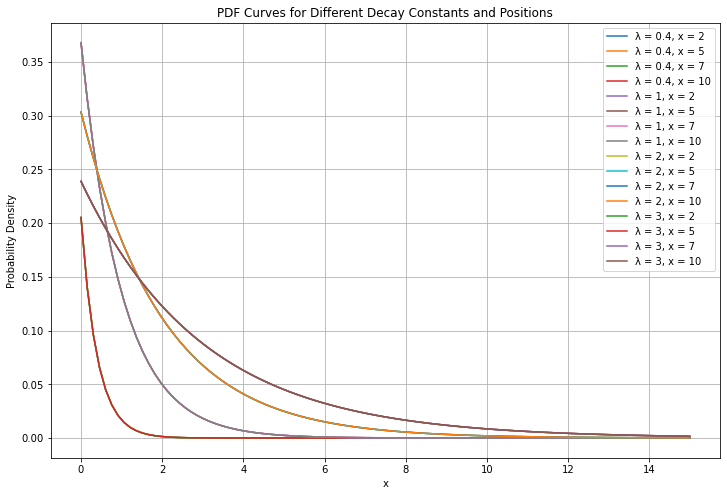

'--------------------Write your code above this line------------------------------'

In [31]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position
        self.normalization_constant = np.exp(1 / self.decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-x / self.decay_constant)

    def pdf_fixed_position(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-self.position / self.decay_constant)

# Create instances for 4 particles with different positions
positions = [2, 5, 7, 10]
x_values = np.linspace(0, 15, 100)

# Plot the PDF curves and label them
plt.figure(figsize=(12, 8))

for decay_constant in [0.4, 1, 2, 3]:
    for position in positions:
        particle = Particle(decay_constant, position)
        pdf_values = [particle.pdf_decay(x) for x in x_values]
        plt.plot(x_values, pdf_values, label=f'λ = {decay_constant}, x = {position}')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF Curves for Different Decay Constants and Positions')
plt.legend()
plt.grid(True)
plt.show()
'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


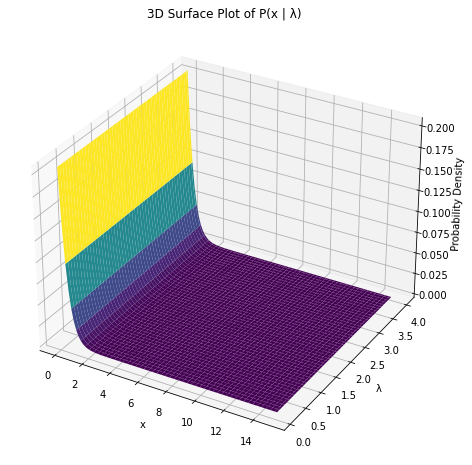

'--------------------Write your code above this line------------------------------'

In [32]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position
        self.normalization_constant = np.exp(1 / self.decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-x / self.decay_constant)

    def pdf_fixed_position(self, x):
        if x < 0:
            return 0
        else:
            return (1 / self.normalization_constant) * (1 / self.decay_constant) * np.exp(-self.position / self.decay_constant)

    def generate_surface_plot(self, x_range, lambda_range, save_path):
        X, Y = np.meshgrid(x_range, lambda_range)
        Z = np.zeros_like(X)
        for i in range(len(x_range)):
            for j in range(len(lambda_range)):
                Z[j, i] = self.pdf_decay(X[j, i])

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('λ')
        ax.set_zlabel('Probability Density')
        ax.set_title('3D Surface Plot of P(x | λ)')
        plt.savefig(save_path)
        plt.show()

# Example usage:
particle = Particle(0.4, 5)
x_range = np.linspace(0, 15, 100)
lambda_range = np.linspace(0.1, 4, 100)
particle.generate_surface_plot(x_range, lambda_range, 'surface_plot.png')
'''--------------------Write your code above this line------------------------------'''

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




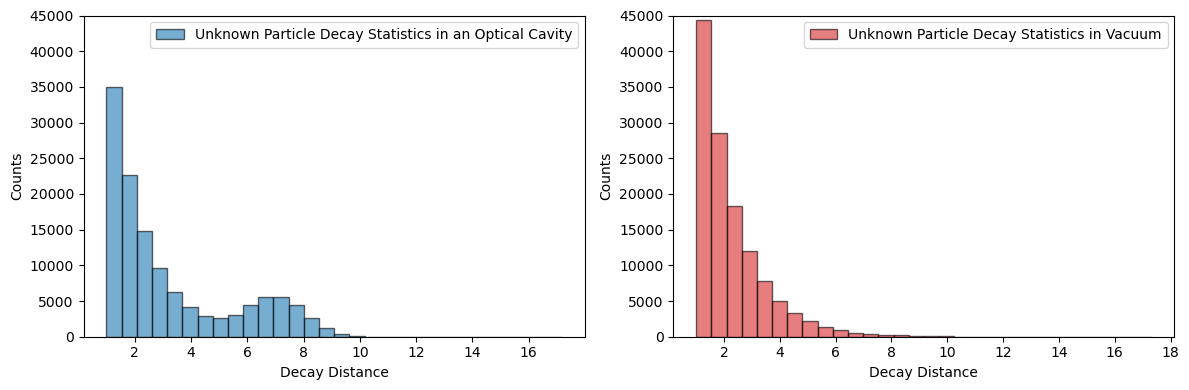

## E)
You can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

In [38]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
'''--------------------Write your code below this line------------------------------'''
import json
from scipy.optimize import minimize
from scipy.stats import expon, norm

# Load the datasets
with open('problem_2/Vacuum_decay_dataset.json', 'r') as file:
    vacuum_data = json.load(file)

with open('problem_2/Cavity_decay_dataset.json', 'r') as file:
    cavity_data = json.load(file)

# Define the likelihood function for the combined model
def combined_likelihood(params, x, data, is_vacuum):
    lambda_val = params[0]
    decay_pdf = expon.pdf(x, scale=1 / lambda_val)
    
    if is_vacuum:
        return -np.sum(np.log(decay_pdf))
    
    mu_val, sigma_val = params[1], params[2]
    gaussian_pdf = (1 / (sigma_val * np.sqrt(2 * np.pi))) * np.exp(-((x - mu_val) ** 2) / (2 * sigma_val ** 2))
    combined_pdf = (1 - proportion) * decay_pdf + proportion * gaussian_pdf
    
    # Handle cases where the pdf is zero by setting a small positive value
    combined_pdf[combined_pdf == 0] = 1e-10
    
    log_likelihood = np.sum(np.log(combined_pdf))
    return -log_likelihood

# Initial parameter values and proportion of particles undergoing Gaussian decay
initial_params = [1.0, 1.0, 1.0]  # Initial values for lambda, mu, and sigma
proportion = 0.2  # Proportion of particles undergoing Gaussian decay

# Estimate parameters for the vacuum dataset
x_vacuum = np.array(vacuum_data)
result_vacuum = minimize(combined_likelihood, initial_params, args=(x_vacuum, vacuum_data, True))
lambda_vacuum = result_vacuum.x[0]  # Vacuum only has the decay constant

# Estimate parameters for the cavity dataset
x_cavity = np.array(cavity_data)
result_cavity = minimize(combined_likelihood, initial_params, args=(x_cavity, cavity_data, False))
lambda_cavity, mu_cavity, sigma_cavity = result_cavity.x

# Print the estimated parameters
print("Vacuum Decay Constant (λ):", lambda_vacuum)
print("Cavity Decay Constant (λ):", lambda_cavity)
print("Cavity Gaussian Mean (μ):", mu_cavity)
print("Cavity Gaussian Standard Deviation (σ):", sigma_cavity)
'''--------------------Write your code above this line------------------------------'''


<ipython-input-38-77418ae87b8e>:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(decay_pdf))
<ipython-input-38-77418ae87b8e>:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(decay_pdf))
<ipython-input-38-77418ae87b8e>:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(decay_pdf))
<ipython-input-38-77418ae87b8e>:31: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(np.log(combined_pdf))


Vacuum Decay Constant (λ): -1033.24
Cavity Decay Constant (λ): -1029.6013047567942
Cavity Gaussian Mean (μ): 84.60705733246438
Cavity Gaussian Standard Deviation (σ): 23.873307539569954


<ipython-input-38-77418ae87b8e>:31: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(np.log(combined_pdf))
<ipython-input-38-77418ae87b8e>:31: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(np.log(combined_pdf))


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
$$M(t | \lambda) = -\frac{1}{\lambda(1-\lambda t)}$$
<br><br> **Steps:** <br>
<br>
It's a simple u-substitution integral with combined exponentials...
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
$$\mu = \frac{1}{\lambda^2} \;\;\sigma^2 = \frac{2}{\lambda^3}$$
<br><br> **Steps:** <br>
<br>
To find the mean, take the first derivative of the MGF with respect to t and evaluate it at t = 0. To find the variance, take the second derivative of the MGF with respect to t and also evaluate it at t = 0.
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

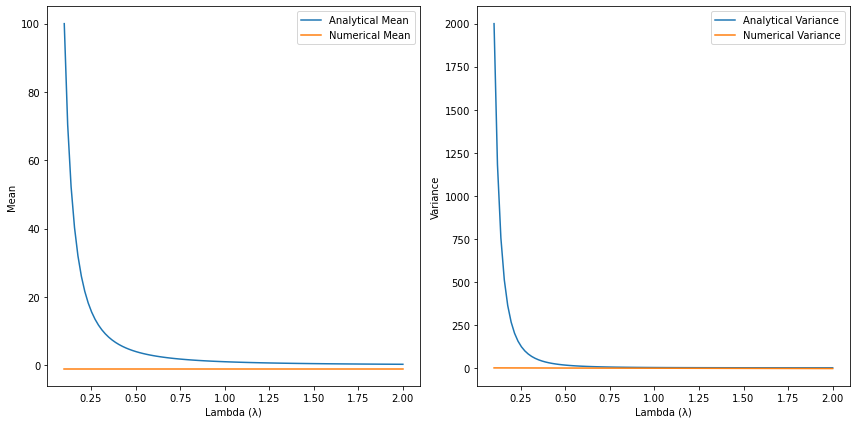

'--------------------Write your code above this line------------------------------'

In [40]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Define the MGF as a function
def MGF(t, lmbda):
    return -1 / (lmbda * (1 - lmbda * t))

# Define functions to compute the first and second derivatives numerically
def numerical_first_derivative(MGF_func, t, lmbda, h=1e-6):
    return (MGF_func(t + h, lmbda) - MGF_func(t, lmbda)) / h

def numerical_second_derivative(MGF_func, t, lmbda, h=1e-6):
    return (MGF_func(t + h, lmbda) - 2 * MGF_func(t, lmbda) + MGF_func(t - h, lmbda)) / (h ** 2)

# Define a range of lambda values
lmbda_values = np.linspace(0.1, 2.0, 100)

# Initialize lists to store analytical and numerical results
analytical_means = []
numerical_means = []
analytical_variances = []
numerical_variances = []

# Calculate analytical and numerical results for each lambda
for lmbda in lmbda_values:
    # Analytical mean and variance
    analytical_mean = 1 / (lmbda ** 2)
    analytical_variance = 2 / (lmbda ** 3)

    # Numerical mean and variance
    t = 0  # Evaluate the derivatives at t=0
    numerical_mean = numerical_first_derivative(MGF, t, lmbda)
    numerical_variance = numerical_second_derivative(MGF, t, lmbda)

    # Append results to the lists
    analytical_means.append(analytical_mean)
    numerical_means.append(numerical_mean)
    analytical_variances.append(analytical_variance)
    numerical_variances.append(numerical_variance)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(lmbda_values, analytical_means, label="Analytical Mean")
plt.plot(lmbda_values, numerical_means, label="Numerical Mean")
plt.xlabel("Lambda (λ)")
plt.ylabel("Mean")
plt.legend()

plt.subplot(122)
plt.plot(lmbda_values, analytical_variances, label="Analytical Variance")
plt.plot(lmbda_values, numerical_variances, label="Numerical Variance")
plt.xlabel("Lambda (λ)")
plt.ylabel("Variance")
plt.legend()

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
$$M(t|N,p) = (e^tp-p+1)^N$$
<br><br> **Steps:** <br>
<br>
Use the formula in part A), which basically just sticks the sum and an $e^{tk}$ in front of the binomial formula. Then use the hints here (basically just the binomial theorem) to combine the $e^t$ and $p$ since they are both raised to power k.
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
$$\mu = Np \;\;\sigma^2= Np(1-p)$$
<br><br> **Steps:** <br>
<br>
Once again, we just take the first derivative for mean and second for variance, and take t = 0. The results are exactly what you'd expect.
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

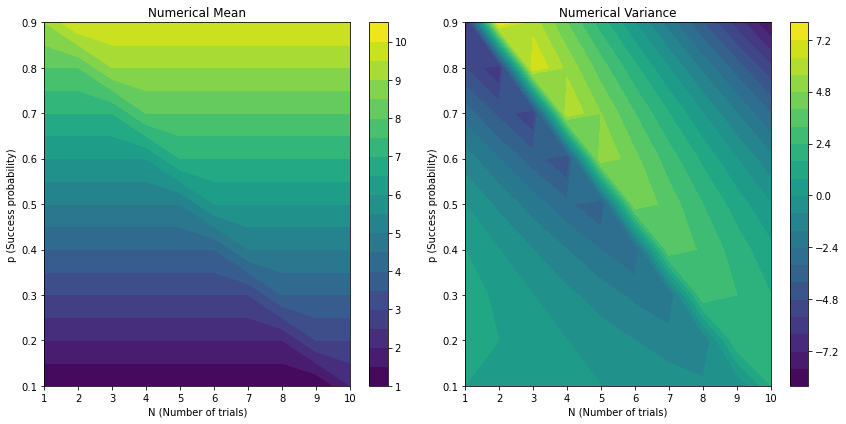

'--------------------Write your code above this line------------------------------'

In [46]:
# I assume that since we're using the binomial distribution it's N and P instead of λ
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the analytical mean and variance for a binomial distribution
def analytical_mean(N, p):
    return N * p

def analytical_variance(N, p):
    return N * p * (1 - p)

# Function to numerically compute derivatives using finite differences
def numerical_derivative(func, x, h=1e-6):
    return (func(x + h) - func(x)) / h

# Define a range of N and p values
N_values = np.arange(1, 11)  # Number of trials
p_values = np.linspace(0.1, 0.9, 9)  # Success probability

# Initialize lists to store analytical and numerical results
numerical_means = []
numerical_variances = []

# Calculate analytical and numerical results for each combination of N and p
for N in N_values:
    for p in p_values:
        # Analytical mean and variance
        true_mean = analytical_mean(N, p)
        true_variance = analytical_variance(N, p)

        # Numerical mean and variance
        # Calculate the first derivative (mean)
        numerical_mean = numerical_derivative(lambda x: (N * x), p)
        # Calculate the second derivative (variance)
        numerical_variance = numerical_derivative(lambda x: (N * x * (1 - x)), p)

        # Append results to the lists
        numerical_means.append(numerical_mean)
        numerical_variances.append(numerical_variance)

# Create a grid for plotting
X, Y = np.meshgrid(N_values, p_values)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.contourf(X, Y, np.array(numerical_means).reshape(X.shape), levels=20)
plt.xlabel("N (Number of trials)")
plt.ylabel("p (Success probability)")
plt.title("Numerical Mean")
plt.colorbar()

plt.subplot(122)
plt.contourf(X, Y, np.array(numerical_variances).reshape(X.shape), levels=20)
plt.xlabel("N (Number of trials)")
plt.ylabel("p (Success probability)")
plt.title("Numerical Variance")
plt.colorbar()

plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''